**NAMA: IKA WIDA NURAGUSTIN**

**NIM: 2311110001**

**KELAS: S1SD-04-01**

**TUGAS 5 PRAKTIKUM IPSD:**

- Unduh data diabetes pada link drive dibawah
https://drive.google.com/file/d/1mjJmx2DA_y_IKbd9FnuGDUzfnGyo3WlW/view?usp=drive_link  
- Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data!
- Hasil dari EDA dan pre-processing dapat diinterpretasikan!
- Lakukan pemodelan menggunakan algoritma klasifikasi KNN, Decision Tree dan Naive Bayes!
- Gunakan matriks evaluasi accuracy score, recall dan precision. buatlah kesimpulan algoritma mana yang paling baik!

**1. Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data!**

In [10]:
# Import Library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Interpretasi:

Kode diatas digunakan untuk import library yang dibutuhkan untuk melakukan EDA dan Pre Processing.

In [11]:
# Load Data

df = pd.read_csv('/content/Training.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Interpretasi:

Kode diatas digunakan untuk load dataset dan melihat beberapa isi dari dataset tersebut.

In [12]:
# Mengetahui Info Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


Interpretasi:

Dari info data tersebut diketahui bahwa dataset ini memiliki 2460 baris dan memiliki 9 kolom/variabel yaitu ada variabel Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, dan Outcome. Yang mana type dari variabelnya itu ada 2 yang float (BMI, DiabetesPedigreeFunction) dan ada 7 yang int (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age, dan Outcome).

In [13]:
# Mengetahui Deskripsi dari data

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Interpretasi:

Dari hasil deskripsi data tersebut diketahui bahwa:

- Rata-rata (mean) jumlah kehamilan adalah sekitar 3.82.
- Rata-rata kadar glukosa adalah 121.60 mg/dL, dengan nilai maksimum mencapai 197 mg/dL, menunjukkan ada individu dengan kadar glukosa tinggi yang mungkin berisiko diabetes.
- Rata-rata tekanan darah adalah 68.92 mmHg, dengan standar deviasi yang cukup besar yaitu 19.08.
- BMI (Indeks Massa Tubuh) memiliki rata-rata sebesar 31.99, menunjukkan bahwa banyak individu dalam dataset ini mungkin mengalami obesitas, karena nilai BMI di atas 30.
- Fungsi Pedigri Diabetes memiliki rata-rata sebesar 0.49, dengan maksimum 2.42, mengindikasikan adanya variasi dalam riwayat keluarga diabetes di antara individu.
- Usia rata-rata individu dalam dataset adalah 32.82 tahun, dengan rentang usia antara 21 hingga 81 tahun.
- Outcome (status diabetes) menunjukkan bahwa sekitar 39% individu dalam dataset mengalami diabetes (nilai 1), sementara 61% tidak (nilai 0).
- Untuk Quartile 1 (Q1) dari setiap variabel yaitu sebagai berikut:
Glucose: 100 mg/dL,
BloodPressure: 64 mmHg,
SkinThickness: 0 mm,
Insulin: 0,
BMI: 27.1,
DiabetesPedigreeFunction: 0.25175,
Age: 24 tahun,
Outcome: 0.
- Untuk Quartile 2 (Q2) dari setiap variabel yaitu sebagai berikut:
Glucose: 117 mg/dL,
BloodPressure: 70 mmHg,
SkinThickness: 23 mm,
Insulin: 36,
BMI: 32.1,
DiabetesPedigreeFunction: 0.381,
Age: 29 tahun,
Outcome: 0.
- Untuk Quartile 3 (Q3) dari setiap variabel yaitu sebagai berikut:
Glucose: 142 mg/dL,
BloodPressure: 80 mmHg,
SkinThickness: 33 mm,
Insulin: 129,
BMI: 36.5,
DiabetesPedigreeFunction: 0.647,
Age: 39 tahun,
Outcome: 1.

In [14]:
# Mengecek adanya duplikan dalam data

df.duplicated().sum()

2000

In [15]:
# Mengecek jumlah data duplikat setiap barisnya

df['duplicate_count_per_row'] = df.apply(lambda x: x.duplicated(keep=False).sum(), axis=1)

print(df)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
2455            3      126             88             41      235  39.3   
2456            4      123             62              0        0  32.0   
2457            1       80             74             11       60  30.0   
2458            1       96             64             27       87  33.2   
2459            6      105             70             32       68  30.8   

      DiabetesPedigreeFunction  Age  Outcome  duplicate_count_per_row  
0                        0.

Interpretasi:

Dari hasil tersebut diketahui bahwa didalam dataset terdapat sebanyak 2000 data duplikat. Tapi karena jumlah data duplikat disetiap barisnya berbeda, maka tidak masalah jika data duplikat ini tidak dihapuskan.

In [16]:
# Mengecek adanya missing value dalam data

df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0
duplicate_count_per_row,0


Interpretasi:

Dari hasil tersebut diketahui bahwa didalam dataset tersebut tidak terdapat missing value disetiap variabelnya (datanya sudah bersih dari missing value).

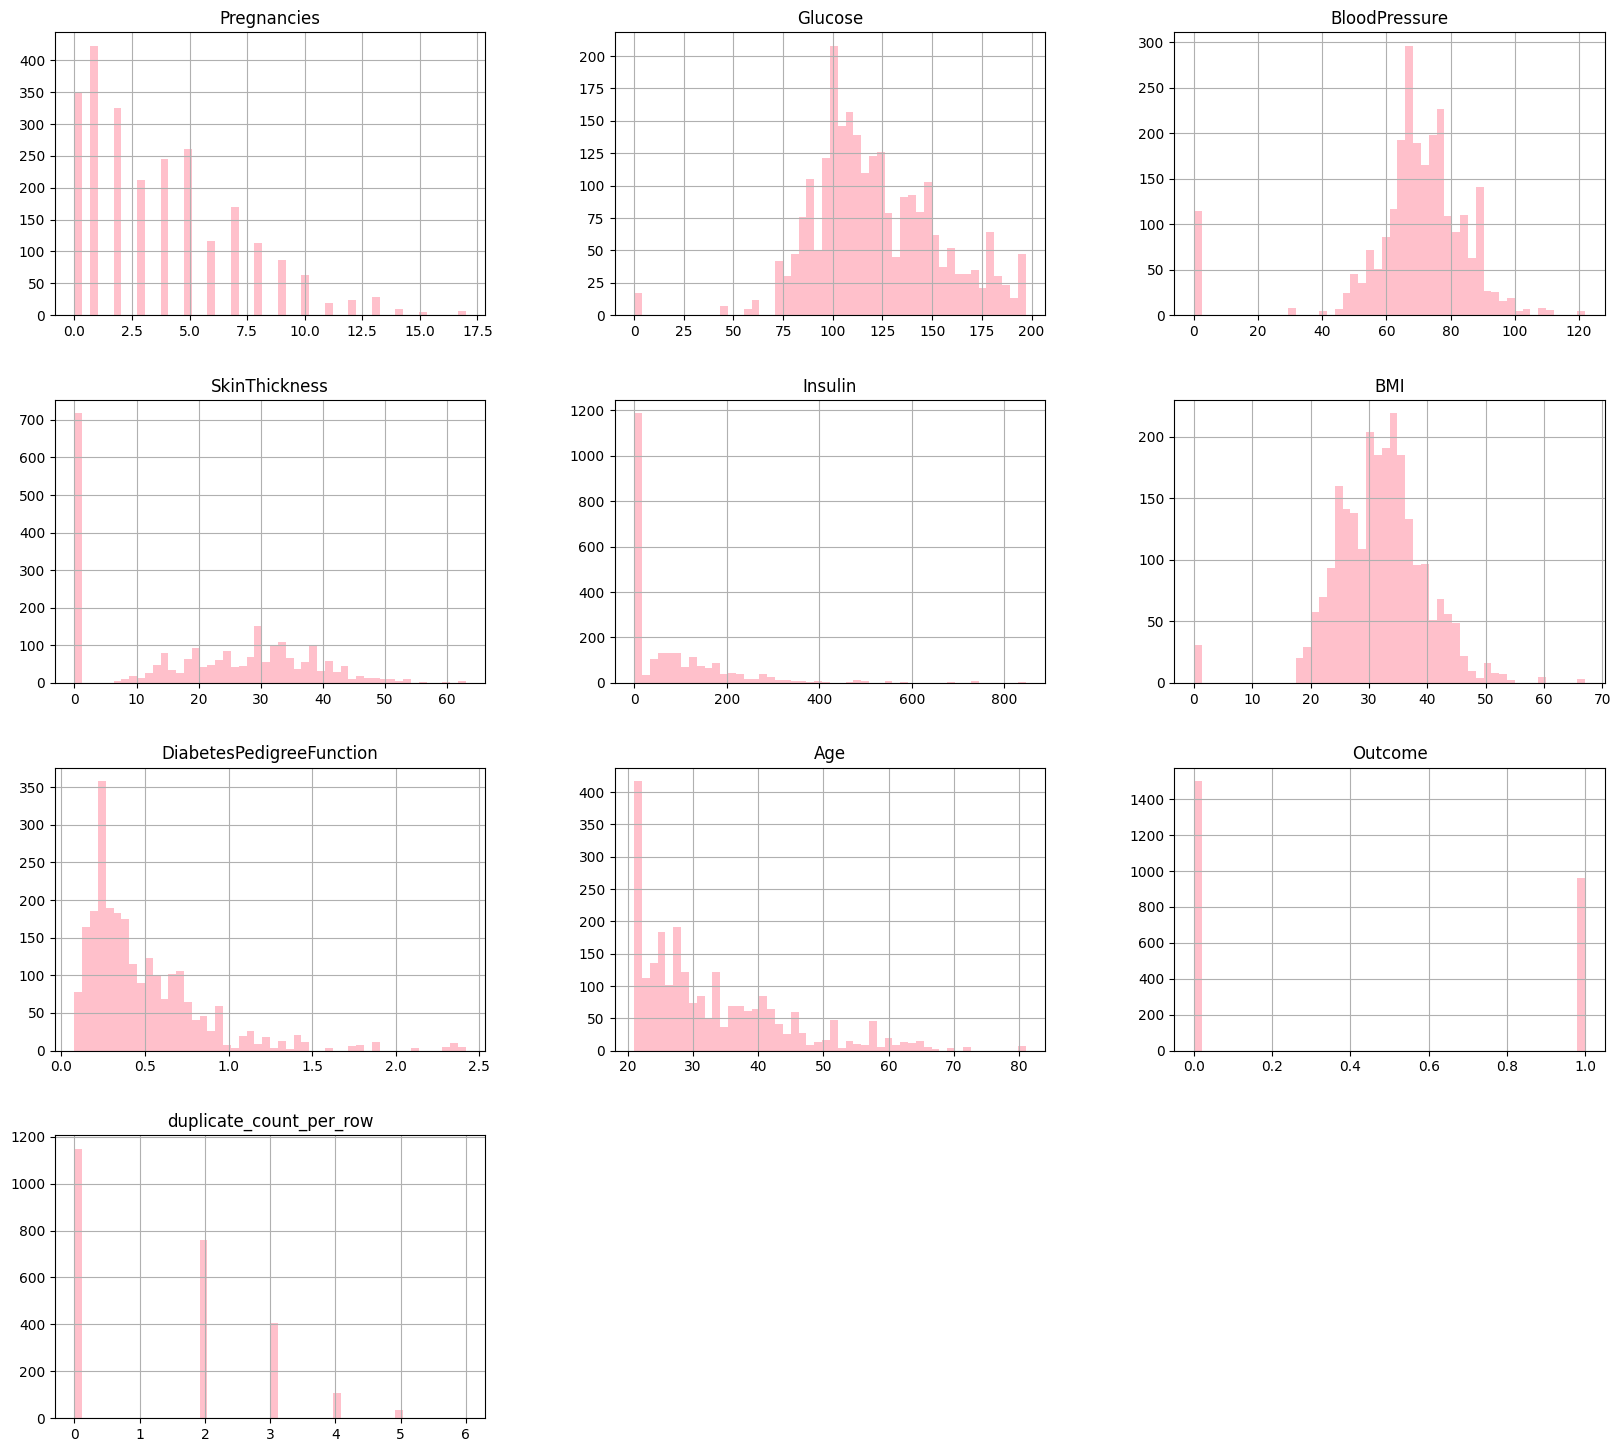

In [17]:
# Membuat visualisasi dari data

df.hist(bins=50, figsize=(20, 18), color='pink');

Interpretasi:

Visualisasi tersebut dilakukan untuk melihat distribusi data didalam dataset. Contohnya dari variabel Glucose dapat diketahui dari visualisasi tersebut bahwa distribusi glukosa sangat bervariasi, dengan puncak di sekitar nilai 100-110.
Ada beberapa nilai glukosa yang sangat rendah (di bawah 50) dan sangat tinggi (mendekati atau di atas 175-200) yang mungkin merupakan outlier.
Distribusi terlihat agak tidak simetris, dengan beberapa nilai ekstrem di kedua ujung distribusi yang bisa memengaruhi interpretasi rata-rata atau varians. Serta memiliki kecenderungan arah kemencengan ke kanan.

In [18]:
# Mengecek adanya outlier dalam data

def outlier(data):
  columns = df.select_dtypes(include=['int','float']).columns
  outlier_counts = {}
  for x in columns:
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[x] < lower_bound) | (data[x] > upper_bound)]
    outlier_counts[x] = len(outliers)

  return outlier_counts

outlier_counts = outlier(df)
print(outlier_counts)

{'Pregnancies': 21, 'Glucose': 17, 'BloodPressure': 140, 'SkinThickness': 0, 'Insulin': 97, 'BMI': 56, 'DiabetesPedigreeFunction': 103, 'Age': 63, 'Outcome': 0, 'duplicate_count_per_row': 2}


Interpretasi:

Dari hasil tersebut dapat dilihat bahwa didalam dataset terdapat outlier disetiap variabelnya dengan rincian yaitu variabel Pregnancies memiliki outlier sebanyak 21, Variabel Glucose memiliki outlier sebanyak 17, BloodPressure memiliki outlier sebanyak 140, Variabel SkinThickness memiliki outlier sebanyak 0, Variabel Insulin memiliki outlier sebanyak 97, Variabel BMI memiliki outlier sebanyak 56, Variabel DiabetesPedigreeFunction memiliki outlier sebanyak 103, Variabel Age memiliki outlier sebanyak 63, dan  Variabel Outcome memiliki outlier sebanyak 0.

In [19]:
# Membersihkan outlier dalam data

def remove_outlier(data):
  columns = df.select_dtypes(include=['int','float']).columns
  cleaned_data = data.copy()
  for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
  return cleaned_data

cleaned_data = remove_outlier(df)
print(cleaned_data)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
5               5      116             74              0        0  25.6   
...           ...      ...            ...            ...      ...   ...   
2455            3      126             88             41      235  39.3   
2456            4      123             62              0        0  32.0   
2457            1       80             74             11       60  30.0   
2458            1       96             64             27       87  33.2   
2459            6      105             70             32       68  30.8   

      DiabetesPedigreeFunction  Age  Outcome  duplicate_count_per_row  
0                        0.

Interpretasi:

Kode diatas digunakan untuk membersihkan outlier didalam data, karena sebelumnya telah diketahui bahwa dalam data tersebut terdapat outlier yang cukup banyak disetiap variabelnya.

In [20]:
# Mengecek info data setelah dibersihkan

df_cleaned = remove_outlier(df)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2027 entries, 0 to 2459
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2027 non-null   int64  
 1   Glucose                   2027 non-null   int64  
 2   BloodPressure             2027 non-null   int64  
 3   SkinThickness             2027 non-null   int64  
 4   Insulin                   2027 non-null   int64  
 5   BMI                       2027 non-null   float64
 6   DiabetesPedigreeFunction  2027 non-null   float64
 7   Age                       2027 non-null   int64  
 8   Outcome                   2027 non-null   int64  
 9   duplicate_count_per_row   2027 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 174.2 KB


Interpretasi:

Dari info data terbaru tersebut diketahui bahwa setelah data dibersihkan barisnya menjadi 2027 yang semula 2460 baris dengan jumlah variabel yaitu 9. Dari 2460 baris menjadi 2027 baris ini termasuk kedalam perubahan yang cukup signifikan.

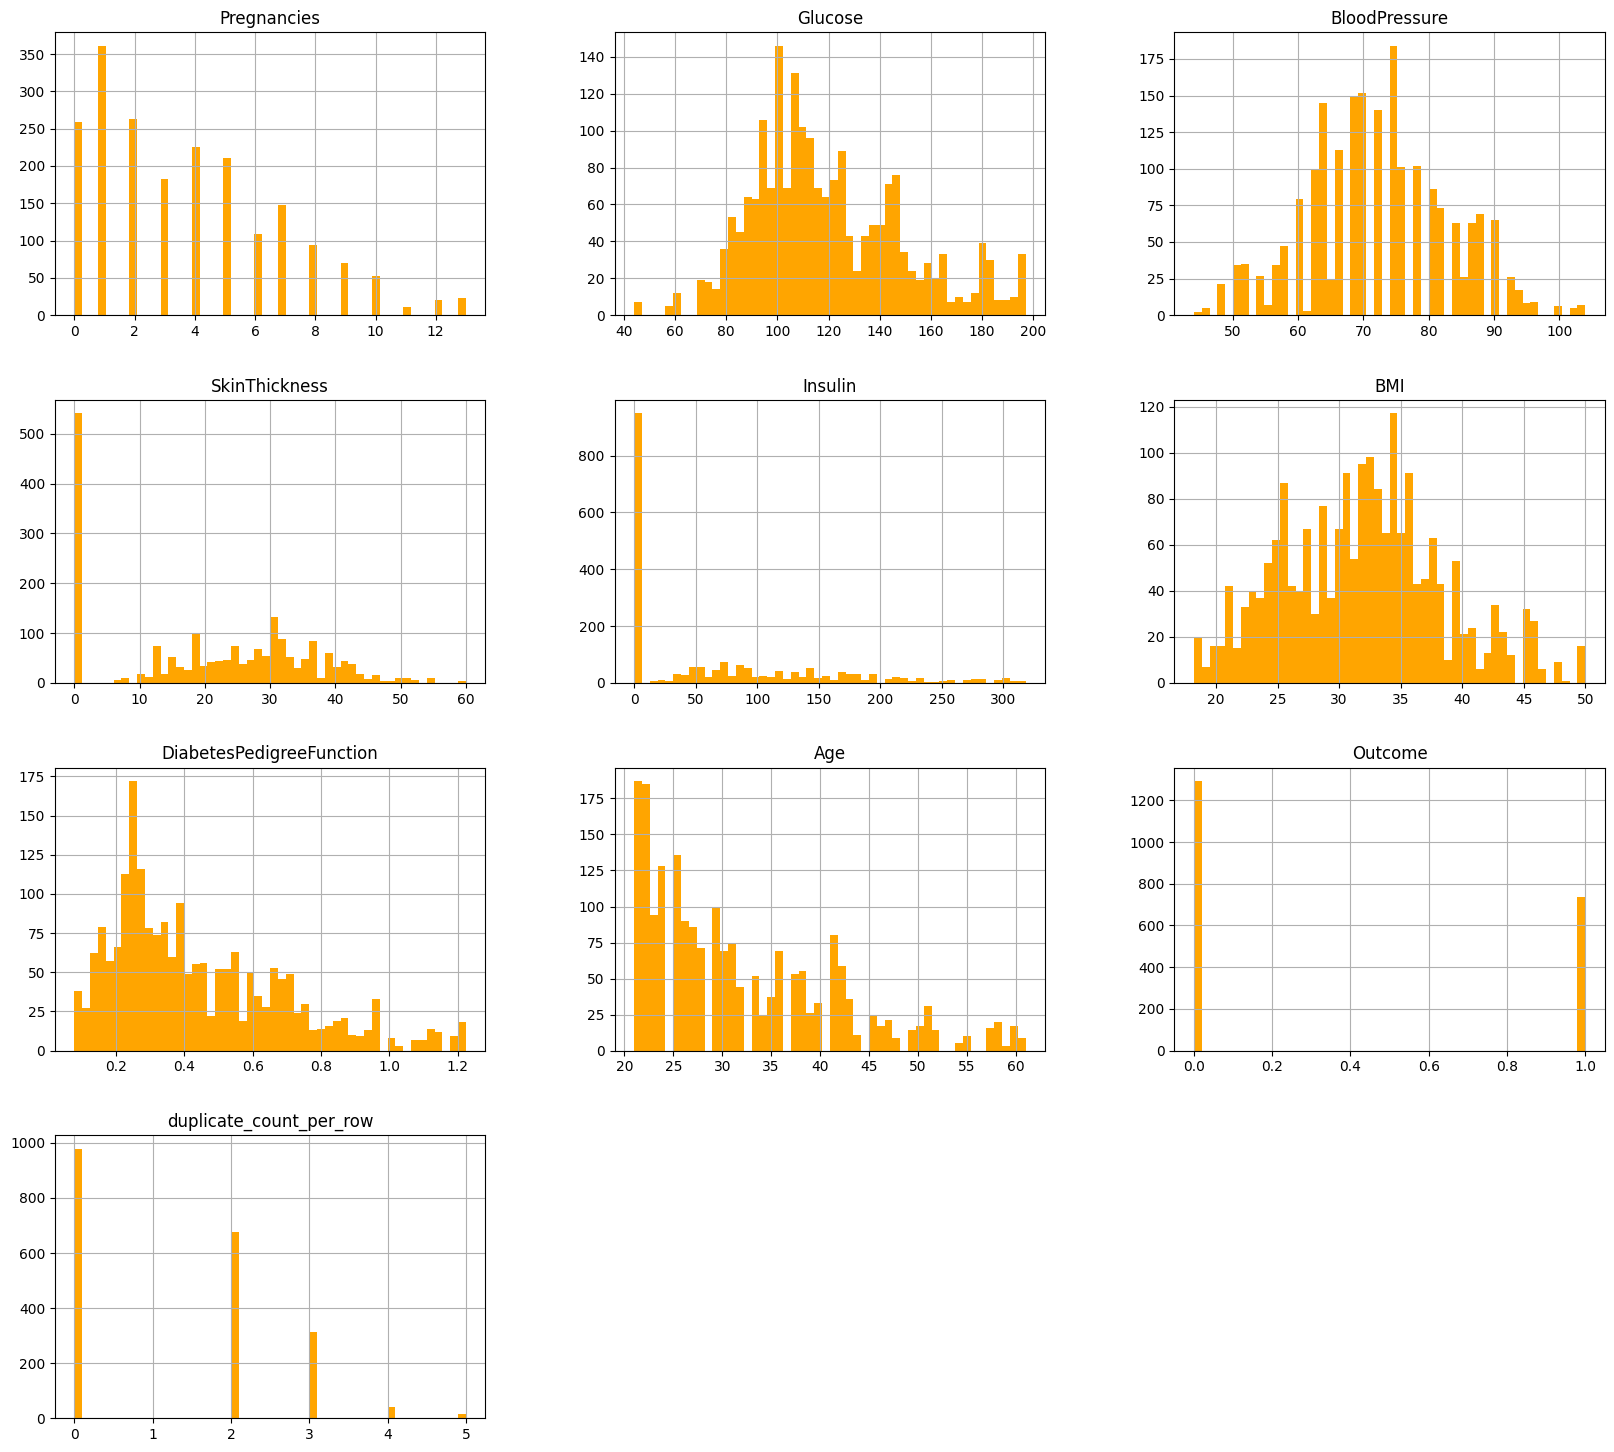

In [21]:
# Membuat Viualisasi data setelah dibersihkan outliernya

df_cleaned.hist(bins=50, figsize=(20, 18), color='orange');

Interpretasi:

Visualisasi data setelah dilakukan pembersihan outlier didalam dataset. Contohnya Variabel Glucose, setelah dataset dibersihkan dapat dilihat dari hasil visualisasinya bahwa distribusi glukosa tampak lebih terfokus di sekitar nilai 80-140, dengan puncak yang tetap berada di sekitar nilai 100-110.
Nilai glukosa ekstrem di bawah 50 dan mendekati 200 tidak terlihat lagi dalam data, menunjukkan bahwa outlier di kedua sisi telah dihapus.
Distribusi sekarang lebih simetris dan mendekati bentuk lonceng, yang biasanya menunjukkan distribusi data yang lebih normal.

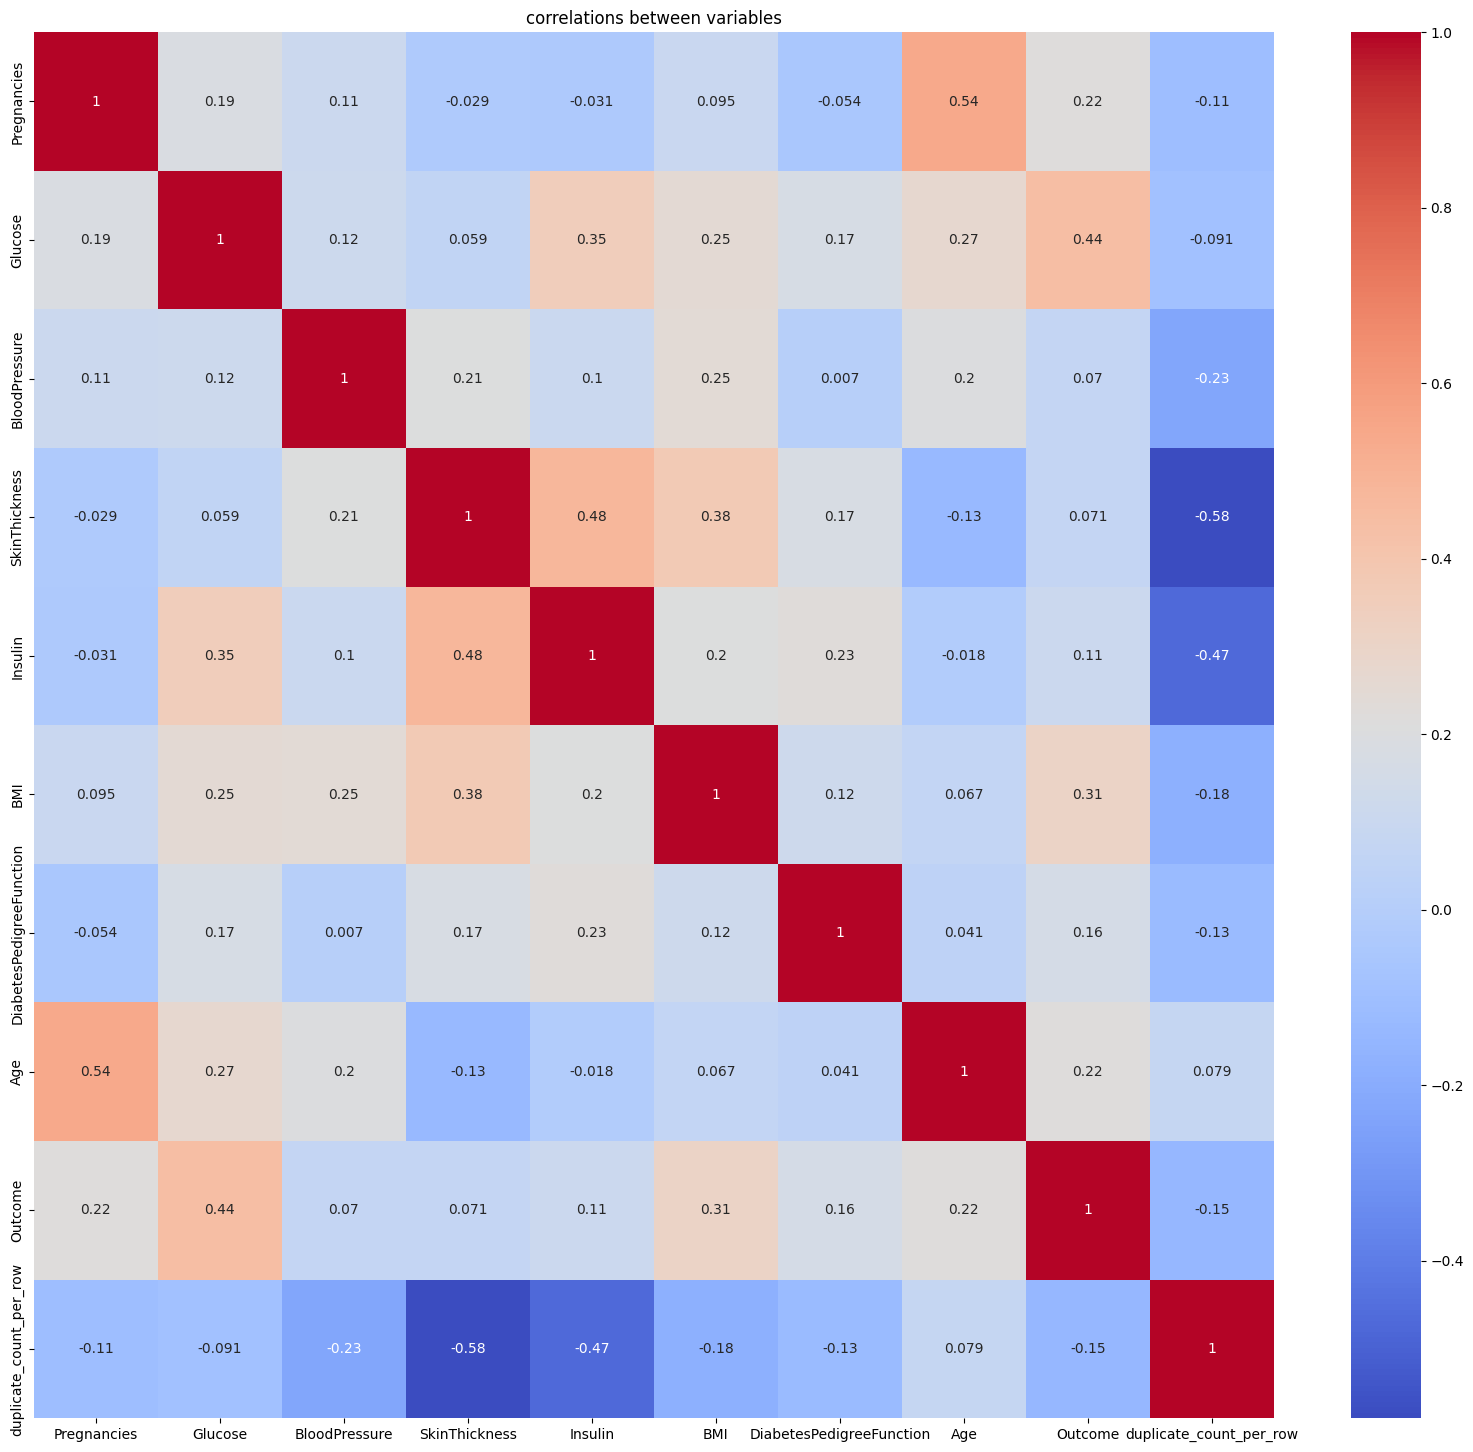

In [22]:
# Mengecek hubungan setiap variabel dalam data

df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(20, 18))
plt.title('correlations between variables')
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

Interpretasi:

Dari hasil heatmap tersebut dapat dilihat hubungan antar variabel-variabel yang terdapat didalam dataset. Baik itu hubungan positif ataupun negatif. Nilai korelasi positif menunjukkan hubungan searah antara dua variabel, sedangkan korelasi negatif menunjukkan hubungan berlawanan arah. Semakin dekat nilai korelasi ke 1 atau -1, semakin kuat hubungan antar variabel tersebut. Sebaliknya, nilai mendekati 0 menunjukkan hubungan yang lemah atau tidak ada hubungan antar variabel.




**2. Hasil dari EDA dan pre-processing dapat diinterpretasikan.**

- Dari hasil EDA dan Pre Processing yang telah dilakukan didapatkan informasi bahwa data terdiri dari 2460 baris dan 9 kolom/variabel. Kolom-kolom ini mencakup informasi seperti tingkat glukosa, tekanan darah, ketebalan kulit, insulin, BMI, dan kolom target Outcome yang menunjukkan apakah seseorang memiliki diabetes (1) atau tidak (0). Semua kolom bertipe numerik.

- Diketahui juga bahwa dari dataset ini tidak terdapat missing value, akan tetapi dataset ini memiliki jumlah data duplikat sebanyak 2000 (tetapi jumlah data duplikat di setiap barisnya berbeda) dan memiliki data outlier sebanyak 497 dengan rincian: Pregnancies: 21, Glucose: 17, BloodPressure: 140, SkinThickness: 0, Insulin: 97, BMI: 56, DiabetesPedigreeFunction: 103, Age: 63, Outcome: 0.

- Diketahui bahwa setelah dataset dibersihkan untuk info data terbaru yang awalnya terdapat 2460 baris menjadi 2027 baris dengan 9 variabel. Setelah data dibersihkan juga terlihat perbedaan dalam hasil visulisasi datanya, yang mana setelah dataset dibersihkan dapat dilihat bahwa distribusi datanya lebih normal dibandingkan dengan distribusi data sebelum dibersihkan.

- Dari dataset ini tidak perlu dilakukan encoding karena semua kolom dalam dataset tersebut adalah data numerik.

- Hubungan antar variabel di dalam dataset ini juga dapat dilihat dari hasil heatmap yang mana antar variabelnya ada yang memiliki hubungan kuat dan ada yang memiliki hubungan lemah, baik itu sifat hubungannya positif atau negatif.




**3. Lakukan pemodelan menggunakan algoritma klasifikasi KNN, Decision Tree dan Naive Bayes!**

A. Menggunakan Algoritma Klasifikasi KNN

In [23]:
# Import Library untuk KNN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Memisahkan data menjadi fitur (x) dan target (y)

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [25]:
# Membagi data menjadi data latih dan data uji

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Melakukan scaling pada fitur untuk model KNN

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Inisialisasi dan melatih model KNN

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

print("Model KNN telah berhasil dilatih.")

Model KNN telah berhasil dilatih.


B. Menggunakan Algoritma Klasifikasi Decision Tree

In [28]:
# Import library untuk Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Memisahkan data menjadi fitur (X) dan target (y)

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [30]:
# Membagi data menjadi data latih dan data uji

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Inisialisasi dan melatih model Decision Tree

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

print("Model Decision Tree telah berhasil dilatih.")

Model Decision Tree telah berhasil dilatih.


C. Menggunakan Algoritma Klasifikasi Naive Bayes

In [32]:
# Import library untuk Naive Bayes

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [33]:
# Memisahkan data menjadi fitur (X) dan target (y)

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [34]:
# Membagi data menjadi data latih dan data uji

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Inisialisasi dan melatih model Naive Bayes

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

print("Model Naive Bayes telah berhasil dilatih.")

Model Naive Bayes telah berhasil dilatih.


**4. Gunakan matriks evaluasi accuracy score, recall dan precision. buatlah kesimpulan algoritma mana yang paling baik!**

In [36]:
# Import library untuk evaluasi

from sklearn.metrics import accuracy_score, recall_score, precision_score

In [37]:
# Fungsi untuk evaluasi model

def evaluate_model(model, X_test, y_test, scaled=False):
    if scaled:
        predictions = model.predict(X_test_scaled)
    else:
        predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)

    return accuracy, recall, precision

In [42]:
# 1. Evaluasi KNN

accuracy_knn, recall_knn, precision_knn = evaluate_model(knn_model, X_test_scaled, y_test, scaled=True)

print("Evaluasi K-Nearest Neighbors (KNN):")
print(f"  - Accuracy : {accuracy_knn:.2f}")
print(f"  - Recall   : {recall_knn:.2f}")
print(f"  - Precision: {precision_knn:.2f}\n")

Evaluasi K-Nearest Neighbors (KNN):
  - Accuracy : 0.95
  - Recall   : 0.92
  - Precision: 0.95



In [43]:
# 2. Evaluasi Decision Tree

accuracy_dt, recall_dt, precision_dt = evaluate_model(decision_tree_model, X_test, y_test, scaled=False)

print("Evaluasi Decision Tree:")
print(f"  - Accuracy : {accuracy_dt:.2f}")
print(f"  - Recall   : {recall_dt:.2f}")
print(f"  - Precision: {precision_dt:.2f}\n")

Evaluasi Decision Tree:
  - Accuracy : 1.00
  - Recall   : 0.99
  - Precision: 1.00



In [44]:
# 3. Evaluasi Naive Bayes

accuracy_nb, recall_nb, precision_nb = evaluate_model(naive_bayes_model, X_test, y_test, scaled=False)

print("Evaluasi Naive Bayes:")
print(f"  - Accuracy : {accuracy_nb:.2f}")
print(f"  - Recall   : {recall_nb:.2f}")
print(f"  - Precision: {precision_nb:.2f}")

Evaluasi Naive Bayes:
  - Accuracy : 0.72
  - Recall   : 0.56
  - Precision: 0.66


In [45]:
# Melihat hasil evaluasi dari semua algoritma pemodelan

print("\nHasil Evaluasi Model:")
print("| Model               | Accuracy | Recall | Precision |")
print("|---------------------|----------|--------|-----------|")
print(f"| K-Nearest Neighbors | {accuracy_knn:.2f}     | {recall_knn:.2f}   | {precision_knn:.2f}      |")
print(f"| Decision Tree       | {accuracy_dt:.2f}     | {recall_dt:.2f}   | {precision_dt:.2f}      |")
print(f"| Naive Bayes         | {accuracy_nb:.2f}     | {recall_nb:.2f}   | {precision_nb:.2f}      |")


Hasil Evaluasi Model:
| Model               | Accuracy | Recall | Precision |
|---------------------|----------|--------|-----------|
| K-Nearest Neighbors | 0.95     | 0.92   | 0.95      |
| Decision Tree       | 1.00     | 0.99   | 1.00      |
| Naive Bayes         | 0.72     | 0.56   | 0.66      |


KESIMPULAN:

Dari hasil evaluasi ketiga algoritma pemodelan tersebut diketahui bahwa:

1. K-Nearest Neighbors (KNN)
- Accuracy: 0.95 menunjukkan bahwa KNN berhasil memprediksi dengan benar 95% dari total data uji.
- Recall: 0.92 menunjukkan bahwa model mampu mendeteksi 92% dari total kasus positif (sensitivitas yang baik).
- Precision: 0.95 berarti 95% dari prediksi positif yang dibuat oleh model adalah benar.
- Interpretasi: KNN memiliki kinerja yang baik dengan nilai akurasi, recall, dan precision yang tinggi. Ini menandakan bahwa model ini andal dalam membuat prediksi yang cukup akurat.

2. Decision Tree
- Accuracy: 1.00 menunjukkan bahwa model memprediksi seluruh data uji dengan benar.
- Recall: 0.99 berarti model hampir sempurna dalam mendeteksi semua kasus positif.
- Precision: 1.00 berarti semua prediksi positif yang dibuat oleh model benar.
- Interpretasi: Decision Tree menunjukkan performa yang sangat baik di semua metrik evaluasi, menjadikannya model yang sangat kuat dalam prediksi.

3. Naive Bayes
- Accuracy: 0.72 menunjukkan bahwa model berhasil memprediksi 72% dari total data uji dengan benar.
- Recall: 0.56 menandakan model tidak begitu baik dalam mendeteksi kasus positif, dengan hanya 56% dari total kasus positif yang terdeteksi.
- Precision: 0.66 menunjukkan bahwa hanya 66% dari prediksi positif yang benar.
- Interpretasi:  Naive Bayes memiliki performa yang lebih rendah dibandingkan dengan KNN dan Decision Tree, terutama pada nilai recall, yang berarti model ini mungkin melewatkan banyak kasus positif.

Jadi, dapat disimpulkan bahwa dari ketiga algoritma pemodelan tersebut yang paling baik adalah Algoritma Pemodelan DECISION TREE (tetapi perlu diuji dengan data tambahan untuk memastikan tidak overfitting). Karena Decision Tree memiliki performa terbaik/paling tinggi dalam semua metrik evaluasi baik Accuracy,Recall ataupun Precision dibandingkan dengan algoritma pemodelan lainnya.
